In [1]:
import torch
import torch.nn as nn
import numpy as np

import musicnet

import pycochleagram.cochleagram as cgram

import matplotlib.pyplot as plt
import seaborn as sns

from models import SparseLayer

D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\erbfilter.py:8: RuntimeWarning: pycochleagram using non-interactive Agg matplotlib backend
  from pycochleagram import utils


In [2]:
def new_fig():
    fig, axes = plt.subplots()
    return axes

In [3]:
def plot_filters(components,lines,cols,normalize = True):
    vmax = components.max()
    for i in range(components.shape[0]):
        plt.subplot(lines,cols,i+1)
        if normalize:
            plt.imshow(components[i].reshape(9,9),interpolation='gaussian',cmap='gray',vmin=0,vmax=vmax)
        else:
            plt.imshow(components[i].reshape(9,9),interpolation='gaussian',cmap='gray')
        plt.tick_params(labelbottom=False,labelleft=False,left=False,bottom=False)


In [4]:
%matplotlib notebook

In [5]:
root = 'D:/Projects/Tsinghua/Deep Learning/Project/music-learning2/data/musicnet'

In [6]:
k = 500 
d = 4096
sr = 44100
window = sr/4
# stride = 512
batch_size = 5
m = 128
window/25*4

1764.0

In [7]:
train_set = musicnet.MusicNet(root=root, train=True, window=window, mmap=False,download=True)#, pitch_shift=5, jitter=.1)

In [8]:
train_loader = torch.utils.data.DataLoader(dataset=train_set,batch_size=batch_size)


In [9]:
s_layer1 = SparseLayer(input_channels=1,output_channels=50,filter_size=9)

In [10]:
s_layer2 = SparseLayer(input_channels=50,output_channels=100,filter_size=9)

In [11]:
s_layer3 = SparseLayer(input_channels=100,output_channels=200,filter_size=9)

In [12]:
# s_layer1.dictionary.set_params(max_iter = 100)
# s_layer2.dictionary.set_params(max_iter = 100)
# s_layer3.dictionary.set_params(max_iter = 100)


In [13]:
s_layer1.dictionary.set_params(verbose=True)
s_layer2.dictionary.set_params(verbose=True)
s_layer3.dictionary.set_params(verbose=True)


DictionaryLearning(alpha=1, code_init=None, dict_init=None,
          fit_algorithm='lars', max_iter=1000, n_components=200,
          n_jobs=None, positive_code=False, positive_dict=False,
          random_state=None, split_sign=False, tol=1e-08,
          transform_algorithm='omp', transform_alpha=None,
          transform_n_nonzero_coefs=None, verbose=True)

In [14]:
s_layer1.dictionary.set_params(positive_dict = True)
s_layer2.dictionary.set_params(positive_dict = True)
s_layer3.dictionary.set_params(positive_dict = True)


DictionaryLearning(alpha=1, code_init=None, dict_init=None,
          fit_algorithm='lars', max_iter=1000, n_components=200,
          n_jobs=None, positive_code=False, positive_dict=True,
          random_state=None, split_sign=False, tol=1e-08,
          transform_algorithm='omp', transform_alpha=None,
          transform_n_nonzero_coefs=None, verbose=True)

In [27]:

with train_set:
    for i, (x, y) in enumerate(train_loader):
        print(i)
        filtered = cgram.human_cochleagram(x.numpy(),sr=44100,fft_mode='fftw',downsample=window/25*4)
        filtered = np.expand_dims(filtered,1)
        s_layer1.train_dictionary(filtered)
#         s1 = s_layer1.forward_conv(filtered)
#         c1 = nn.MaxPool2d(kernel_size=9,stride=(2,5))(s1)
#         s_layer2.train_dictionary(c1.numpy())
#         s2 = s_layer2.forward_conv(c1.numpy())
#         c2 = nn.MaxPool2d(kernel_size=9,stride = (2,5))(s2)
#         s_layer3.train_dictionary(c2.numpy())
#         s3 = s_layer3.forward_conv(c2.numpy())
#         c3 = nn.MaxPool2d(kernel_size=9,stride = (2,5))(s3)
        

0
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
2
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
3
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
4
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
5
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
6
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
7
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
8
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
9
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
10
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
11
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
12
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
13
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
14
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
15
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
16
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
17
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
18
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
19
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
20
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
21
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
22
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
23
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
24
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
25
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
26
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
27
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
28
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
29
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
30
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
31
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
32
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
33
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
34
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
35
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
36
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
37
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
38
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
39
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
40
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
41
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
42
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
43
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
44
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
45
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
46
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
47
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
48
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
49
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
50
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
51
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
52
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
53
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
54
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
55
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
56
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
57
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
58
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
59
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
60
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
61
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
62
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
63
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
64
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
65
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
66
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
67
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
68
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
69
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
70
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
71
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
72
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
73
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
74
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
75
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
76
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
77
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
78
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
79
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
80
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
81
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
82
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
83
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
84
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
85
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
86
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
87
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
88
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
89
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
90
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
91
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
92
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
93
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
94
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
95
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
96
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
97
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
98
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
99
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
100
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
101
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
102
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
103
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
104
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
105
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
106
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
107
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
108
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
109
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
110
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
111
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
112
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
113
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
114
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
115
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
116
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
117
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
118
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
119
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
120
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
121
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
122
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
123
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
124
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
125
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
126
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
127
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
128
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
129
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
130
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
131
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
132
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
133
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
134
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
135
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
136
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
137
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
138
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
139
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
140
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
141
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
142
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
143
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
144
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
145
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
146
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
147
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
148
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
149
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
150
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
151
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
152
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
153
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
154
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
155
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
156
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
157
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
158
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
159
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
160
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
161
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
162
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
163
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
164
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
165
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
166
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
167
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
168
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
169
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
170
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
171
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
172
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
173
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
174
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
175
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
176
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
177
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
178
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
179
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
180
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
181
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
182
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
183
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
184
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
185
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
186
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
187
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
188
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
189
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
190
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
191
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
192
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
193
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
194
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
195
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
196
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
197
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
198
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
199
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
200
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
201
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
202
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
203
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
204
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
205
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
206
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
207
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
208
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
209
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
210
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
211
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
212
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
213
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
214
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
215
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
216
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
217
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
218
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
219
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
220
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
221
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
222
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
223
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
224
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
225
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
226
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
227
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
228
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
229
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
230
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
231
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
232
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
233
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
234
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
235
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
236
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
237
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
238
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
239
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
240
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
241
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
242
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
243
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
244
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
245
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
246
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
247
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
248
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
249
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
250
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
251
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
252
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
253
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
254
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
255
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
256
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
257
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
258
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
259
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
260
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
261
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
262
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
263
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
264
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
265
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
266
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
267
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
268
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
269
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
270
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
271
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
272
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
273
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
274
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
275
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
276
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
277
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
278
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
279
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
280
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
281
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
282
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
283
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
284
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
285
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
286
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
287
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
288
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
289
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
290
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
291
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
292
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
293
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
294
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
295
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
296
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
297
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
298
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
299
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
300
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
301
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
302
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
303
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
304
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
305
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
306
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
307
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
308
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
309
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
310
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
311
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
312
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
313
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
314
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
315
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
316
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
317
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
318
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
319
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
320
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
321
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
322
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
323
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
324
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
325
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
326
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
327
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
328
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
329
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
330
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
331
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
332
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
333
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
334
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
335
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
336
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
337
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
338
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
339
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
340
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
341
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
342
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
343
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
344
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
345
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
346
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
347
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
348
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
349
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
350
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
351
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
352
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
353
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
354
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
355
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
356
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
357
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
358
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
359
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
360
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
361
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
362
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
363
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
364
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
365
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
366
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
367
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
368
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
369
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
370
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
371
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
372
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
373
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
374
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
375
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
376
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
377
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
378
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
379
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
380
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
381
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
382
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
383
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
384
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
385
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
386
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
387
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
388
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
389
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
390
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
391
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
392
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
393
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
394
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
395
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
396
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
397
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
398
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
399
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
400
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
401
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
402
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
403
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
404
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
405
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
406
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
407
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
408
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
409
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
410
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
411
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
412
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
413
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
414
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
415
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
416
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
417
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
418
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
419
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
420
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
421
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
422
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
423
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
424
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
425
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
426
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
427
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
428
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
429
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
430
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
431
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
432
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
433
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
434
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
435
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
436
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
437
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
438
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
439
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
440
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
441
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
442
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
443
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
444
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
445
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
446
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
447
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
448
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
449
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
450
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
451
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
452
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
453
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
454
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
455
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
456
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
457
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
458
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
459
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
460
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
461
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
462
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
463
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
464
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
465
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
466
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
467
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
468
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
469
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
470
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
471
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
472
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
473
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
474
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
475
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
476
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
477
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
478
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
479
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
480
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
481
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
482
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
483
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
484
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
485
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
486
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
487
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
488
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
489
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
490
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
491
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
492
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
493
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
494
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
495
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
496
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
497
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
498
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
499
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
500
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
501
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
502
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
503
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
504
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
505
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
506
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
507
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
508
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
509
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
510
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
511
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
512
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
513
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
514
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
515
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
516
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
517
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
518
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
519
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
520
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
521
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
522
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
523
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
524
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
525
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
526
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
527
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
528
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
529
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
530
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
531
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
532
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
533
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
534
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
535
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
536
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
537
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
538
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
539
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
540
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
541
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
542
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
543
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
544
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
545
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
546
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
547
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
548
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
549
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
550
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
551
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
552
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
553
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
554
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
555
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
556
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
557
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
558
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
559
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
560
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
561
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
562
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
563
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
564
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
565
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
566
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
567
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
568
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
569
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
570
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
571
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
572
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
573
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
574
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
575
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
576
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
577
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
578
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
579
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
580
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
581
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
582
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
583
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
584
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
585
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
586
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
587
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
588
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
589
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
590
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
591
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
592
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
593
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
594
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
595
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
596
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
597
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
598
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
599
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
600
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
601
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
602
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
603
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
604
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
605
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
606
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
607
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
608
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
609
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
610
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
611
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
612
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
613
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
614
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
615
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
616
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
617
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
618
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
619
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
620
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
621
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
622
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
623
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
624
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
625
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
626
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
627
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
628
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
629
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
630
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
631
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
632
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
633
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
634
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
635
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
636
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
637
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
638
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
639
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
640
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
641
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
642
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
643
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
644
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
645
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
646
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
647
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
648
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
649
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
650
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
651
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
652
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
653
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
654
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
655
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
656
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
657
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
658
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
659
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
660
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
661
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
662
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
663
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
664
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
665
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
666
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
667
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
668
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
669
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
670
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
671
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
672
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
673
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
674
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
675
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
676
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
677
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
678
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
679
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
680
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
681
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
682
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
683
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
684
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
685
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
686
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
687
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
688
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
689
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
690
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
691
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
692
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
693
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
694
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
695
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
696
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
697
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
698
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
699
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
700
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
701
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
702
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
703
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
704
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
705
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
706
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
707
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
708
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
709
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
710
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
711
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
712
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
713
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
714
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
715
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
716
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
717
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
718
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
719
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
720
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
721
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
722
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
723
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
724
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
725
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
726
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
727
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
728
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
729
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
730
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
731
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
732
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
733
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
734
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
735
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
736
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
737
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
738
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
739
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
740
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
741
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
742
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
743
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
744
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
745
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
746
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
747
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
748
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
749
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
750
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
751
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
752
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
753
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
754
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
755
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
756
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
757
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
758
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
759
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
760
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
761
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
762
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
763
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
764
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
765
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
766
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
767
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
768
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
769
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
770
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
771
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
772
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
773
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
774
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
775
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
776
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
777
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
778
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
779
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
780
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
781
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
782
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
783
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
784
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
785
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
786
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
787
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
788
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
789
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
790
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
791
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
792
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
793
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
794
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
795
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
796
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
797
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
798
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
799
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
800
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
801
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
802
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
803
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
804
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
805
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
806
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
807
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
808
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
809
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
810
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
811
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
812
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
813
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
814
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
815
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
816
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
817
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
818
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
819
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
820
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
821
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
822
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
823
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
824
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
825
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
826
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
827
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
828
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
829
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
830
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
831
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
832
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
833
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
834
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
835
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
836
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
837
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
838
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
839
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
840
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
841
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
842
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
843
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
844
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
845
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
846
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
847
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
848
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
849
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
850
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
851
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
852
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
853
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
854
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
855
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
856
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
857
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
858
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
859
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
860
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
861
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
862
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
863
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
864
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
865
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
866
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
867
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
868
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
869
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
870
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
871
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
872
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
873
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
874
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
875
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
876
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
877
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
878
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
879
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
880
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
881
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
882
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
883
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
884
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
885
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
886
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
887
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
888
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
889
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
890
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
891
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
892
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
893
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
894
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
895
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
896
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
897
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
898
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
899
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
900
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
901
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
902
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
903
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
904
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
905
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
906
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
907
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
908
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
909
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
910
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
911
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
912
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
913
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
914
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
915
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
916
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
917
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
918
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
919
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
920
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
921
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
922
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
923
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
924
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
925
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
926
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
927
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
928
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
929
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
930
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
931
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
932
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
933
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
934
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
935
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
936
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
937
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
938
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
939
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
940
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
941
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
942
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
943
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
944
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
945
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
946
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
947
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
948
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
949
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
950
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
951
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
952
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
953
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
954
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
955
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
956
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
957
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
958
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
959
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
960
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
961
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
962
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
963
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
964
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
965
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
966
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
967
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
968
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
969
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
970
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
971
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
972
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
973
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
974
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
975
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
976
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
977
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
978
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
979
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
980
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
981
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
982
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
983
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
984
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
985
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
986
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
987
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
988
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
989
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
990
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
991
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
992
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
993
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
994
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
995
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
996
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
997
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
998
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
999
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1000
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1001
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1002
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1003
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1004
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1005
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1006
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1007
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1008
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1009
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1010
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1011
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1012
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1013
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1014
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1015
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1016
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1017
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1018
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1019
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1020
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1021
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1022
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1023
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1024
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1025
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1026
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1027
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1028
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1029
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1030
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1031
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1032
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1033
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1034
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1035
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1036
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1037
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1038
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1039
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1040
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1041
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1042
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1043
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1044
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1045
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1046
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1047
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1048
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1049
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1050
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1051
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1052
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1053
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1054
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1055
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1056
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1057
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1058
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1059
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1060
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1061
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1062
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1063
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1064
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1065
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1066
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1067
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1068
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1069
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1070
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1071
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1072
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1073
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1074
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1075
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1076
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1077
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1078
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1079
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1080
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1081
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1082
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1083
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1084
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1085
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1086
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1087
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1088
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1089
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1090
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1091
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1092
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1093
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1094
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1095
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1096
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1097
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1098
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1099
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1100
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1101
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1102
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1103
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1104
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1105
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1106
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1107
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1108
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1109
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1110
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1111
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1112
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1113
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1114
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1115
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1116
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1117
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1118
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1119
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1120
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1121
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1122
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1123
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1124
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1125
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1126
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1127
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1128
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1129
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1130
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1131
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1132
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1133
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1134
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1135
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1136
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1137
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1138
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1139
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1140
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1141
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1142
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1143
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1144
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1145
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1146
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1147
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1148
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1149
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1150
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1151
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1152
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1153
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1154
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1155
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1156
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1157
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1158
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1159
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1160
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1161
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1162
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1163
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1164
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1165
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1166
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1167
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1168
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1169
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1170
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1171
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1172
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1173
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1174
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1175
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1176
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1177
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1178
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1179
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1180
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1181
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1182
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1183
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1184
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1185
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1186
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1187
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1188
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1189
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1190
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1191
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1192
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1193
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1194
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1195
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1196
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1197
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1198
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1199
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1200
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1201
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1202
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1203
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1204
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1205
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1206
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1207
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1208
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1209
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1210
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1211
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1212
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1213
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1214
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1215
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1216
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1217
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1218
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1219
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1220
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1221
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1222
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1223
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1224
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1225
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1226
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1227
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1228
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1229
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1230
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1231
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1232
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1233
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1234
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1235
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1236
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1237
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1238
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1239
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1240
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1241
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1242
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1243
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1244
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1245
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1246
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1247
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1248
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1249
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1250
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1251
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1252
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1253
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1254
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1255
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1256
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1257
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1258
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1259
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1260
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1261
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1262
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1263
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1264
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1265
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1266
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1267
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1268
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1269
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1270
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1271
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1272
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1273
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1274
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1275
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1276
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1277
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1278
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1279
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1280
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1281
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1282
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1283
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1284
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1285
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1286
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1287
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1288
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1289
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1290
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1291
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1292
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1293
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1294
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1295
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1296
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1297
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1298
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1299
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1300
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1301
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1302
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1303
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1304
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1305
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1306
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1307
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1308
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1309
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1310
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1311
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1312
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1313
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1314
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1315
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1316
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1317
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1318
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1319
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1320
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1321
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1322
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


[dict_learning] .++++++++++++++++++++++++++++++++++++++++++++++++++.++++++++++++++++++++++++++++++++++++++++++++++++++
1323
here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


KeyboardInterrupt: 

In [80]:

with train_set:
    for i, (x, y) in enumerate(train_loader):
#         print(i)
        filtered = cgram.human_cochleagram(x.numpy(),sr=44100,fft_mode='fftw',downsample=window/25*4)
        filtered = np.expand_dims(filtered,1)
        print(filtered.max())
        patches = s_layer1.extract_patches(filtered)
        break
patches.max()

here
0.013440299311778132


0.013440299311778132

In [86]:
maxes = patches.max(axis = 1)

<IPython.core.display.Javascript object>


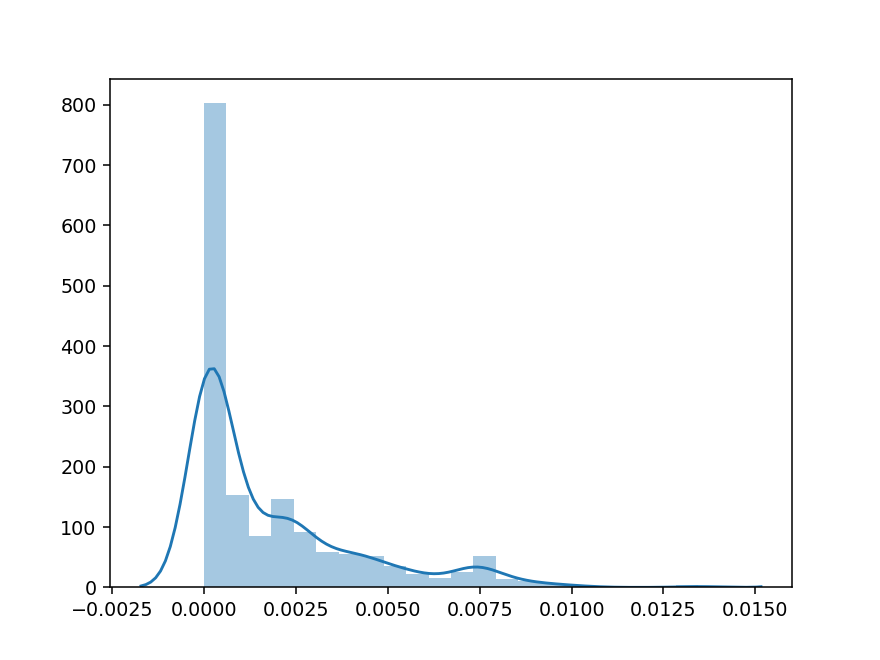

In [91]:
new_fig()
sns.distplot(maxes)

In [20]:
s_layer1.coder.get_params().keys()

dict_keys(['dictionary', 'n_jobs', 'positive_code', 'split_sign', 'transform_algorithm', 'transform_alpha', 'transform_n_nonzero_coefs'])

In [28]:
filtered.shape

(5, 1, 81, 441)

In [25]:
x.shape

torch.Size([5, 11025])

In [88]:
import seaborn as sns

In [44]:
patches = patches.reshape(-1,9,9)

<IPython.core.display.Javascript object>


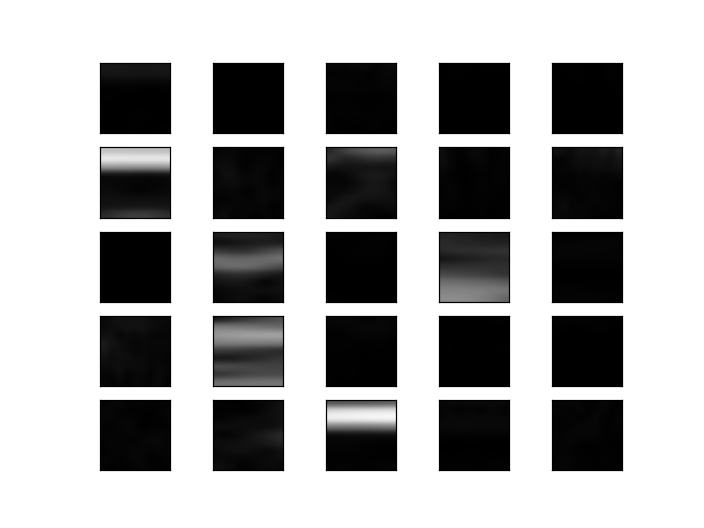

<IPython.core.display.Javascript object>


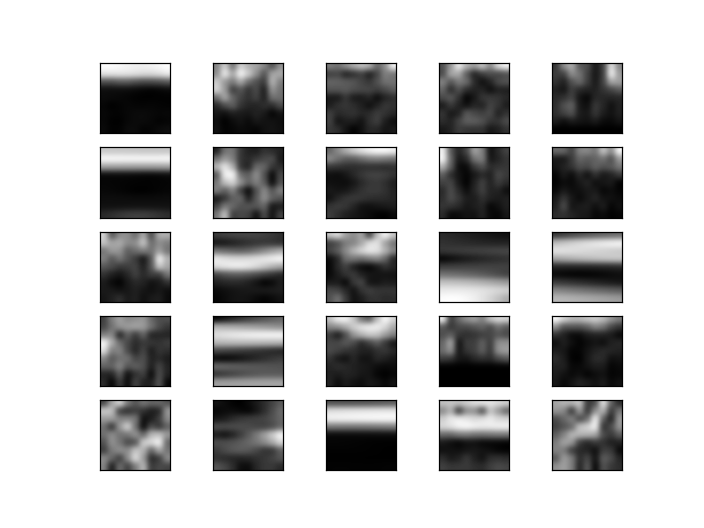

In [128]:
new_fig()
indx = np.random.randint(patches.shape[0],size=25)

plot_filters(patches[indx],5,5)
new_fig()
plot_filters(patches[indx],5,5,False)


In [28]:
components = np.concatenate((components,s_layer1.dictionary.components_.reshape(-1,9,9)),axis=0)

# components = s_layer1.dictionary.components_.reshape(-1,9,9)

new_fig()
plot_filters(components,5,5)

ValueError: all the input arrays must have same number of dimensions

<IPython.core.display.Javascript object>


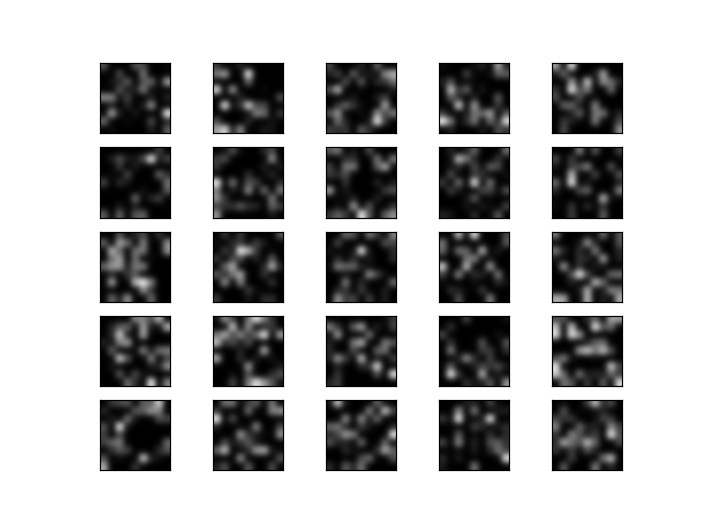

In [30]:
components = s_layer1.dictionary.components_
indx = np.random.randint(components.shape[0],size=25)

new_fig()
plot_filters(components[:25],5,5,False)

In [ ]:
# s_layer1_(a[0])

In [57]:
# with train_set:
#     for i, (x, y) in enumerate(train_loader):
#         print(i)
#         filtered = cgram.human_cochleagram(x.numpy(),sr=44100,fft_mode='fftw',downsample=window/25*4)
#         filtered = np.expand_dims(filtered,1)
#         s1 = s_layer.forward(filtered)
#         c1 = nn.MaxPool2d(kernel_size=21)(s1)
#         s_layer2.train_dictionary(c1.numpy())
        

In [ ]:
s1

In [32]:

components.shape

(5, 81)

In [33]:
components.shape

(5, 9, 9)

<IPython.core.display.Javascript object>


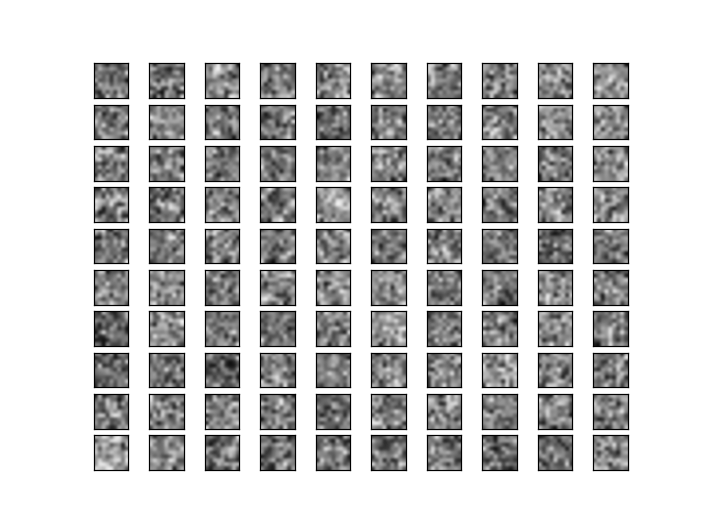

In [64]:
new_fig()
plot_filters(components2,10,10)

In [58]:
with train_set:
    for i, (x, y) in enumerate(train_loader):
        a = x
        break

In [12]:
filtered = cgram.human_cochleagram(a.numpy(),sr=44100,fft_mode='fftw',downsample=window/25*4)


here


In [13]:
filtered = cgram.human_cochleagram(a.numpy(),sr=44100,fft_mode='fftw',downsample=window/25*4)


here


In [14]:
filtered = np.expand_dims(filtered,1)


In [22]:
stacked_patches = to_windows(filtered,kernel_size=9).reshape(-1,9,9)

In [24]:
batch_size = 500

In [26]:
indx = np.random.randint(stacked_patches.shape[0],size = batch_size)

In [28]:
stacked_patches[indx].shape

(500, 9, 9)

In [22]:
%%timeit
s_layer.train_dictionary(filtered)


45.7 s ± 579 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
s_layer.dictionary_trainer.get_params('max_iter')

{'alpha': 1,
 'code_init': None,
 'dict_init': array([[-0.00857234, -0.0153034 ,  0.01436848, ...,  0.0121112 ,
          0.08018938,  0.01249922],
        [-0.05851202, -0.01540868,  0.01505243, ...,  0.0119826 ,
         -0.02641223,  0.0326388 ],
        [-0.00037461,  0.03160287,  0.03551273, ..., -0.00760617,
          0.06935684, -0.04338514],
        ...,
        [ 0.05480291,  0.03096614,  0.10586783, ...,  0.0745681 ,
          0.05083159, -0.04091069],
        [ 0.03998804,  0.00554513, -0.00973604, ...,  0.03402904,
          0.01919573, -0.04387585],
        [-0.01674463, -0.00755503, -0.06759603, ..., -0.04996196,
         -0.04745884, -0.05904293]]),
 'fit_algorithm': 'lars',
 'max_iter': 10,
 'n_components': 100,
 'n_jobs': None,
 'positive_code': False,
 'positive_dict': False,
 'random_state': None,
 'split_sign': False,
 'tol': 1e-08,
 'transform_algorithm': 'omp',
 'transform_alpha': None,
 'transform_n_nonzero_coefs': None,
 'verbose': False}

In [12]:
i = np.random.randint(100)
i

84

In [13]:
new_fig().plot(a[i].numpy())

<IPython.core.display.Javascript object>

In [14]:
filtered = cgram.human_cochleagram(a[:5].numpy(),sr=44100,fft_mode='fftw',downsample=window/25*4)

here


D:\Anaconda3\lib\site-packages\pycochleagram-0.1-py3.7.egg\pycochleagram\cochleagram.py:135: RuntimeWarning: divide by zero encountered in log10
  freqs_to_plot = np.log10(freqs)


In [20]:
filtered.shape

(5, 1, 81, 441)

In [16]:
filtered = np.expand_dims(filtered[:5],1)

<IPython.core.display.Javascript object>


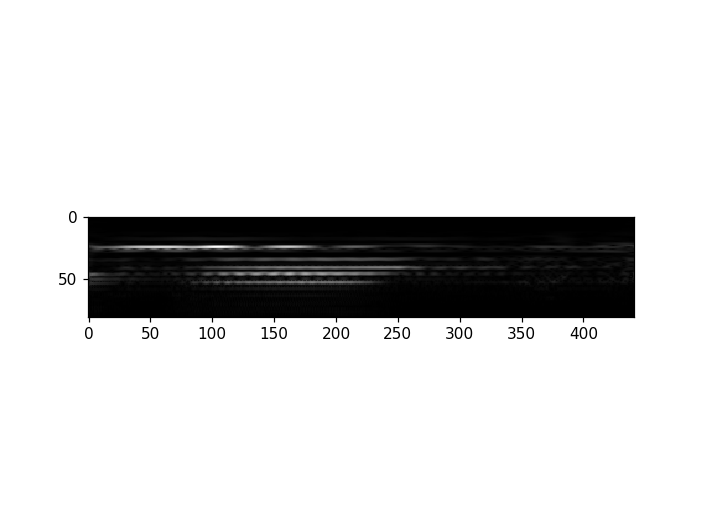

In [23]:
new_fig().imshow(filtered[4,0],cmap='gray')

In [24]:
from sklearn.decomposition import DictionaryLearning

In [25]:
dl = DictionaryLearning(n_components=200)

In [26]:
dl.get_params()

{'alpha': 1,
 'code_init': None,
 'dict_init': None,
 'fit_algorithm': 'lars',
 'max_iter': 1000,
 'n_components': 200,
 'n_jobs': None,
 'positive_code': False,
 'positive_dict': False,
 'random_state': None,
 'split_sign': False,
 'tol': 1e-08,
 'transform_algorithm': 'omp',
 'transform_alpha': None,
 'transform_n_nonzero_coefs': None,
 'verbose': False}

In [16]:
from numpy.lib.stride_tricks import as_strided


In [17]:
def to_windows(input, kernel_size, step_size=1):
    out_shape = input.shape[:2]
    out_shape += ((input.shape[2] - kernel_size)//step_size +1, (input.shape[3] - kernel_size)//step_size +1) + (kernel_size,kernel_size)
    input_srides = input.strides
    strides = input_srides[:2] + tuple(np.array(input.strides[-2:])*step_size) + input_srides[-2:]
    return as_strided(input, shape = out_shape, strides = strides,writeable=False)



In [18]:
pad = 4
padded = np.pad(filtered,((0,0),(0,0),(pad,pad),(pad,pad)),mode='constant')


In [32]:
windowed = to_windows(padded,9)

In [33]:
windowed.shape

(5, 1, 81, 441, 9, 9)

In [34]:
stacked = windowed.reshape(-1,9,9)

<IPython.core.display.Javascript object>


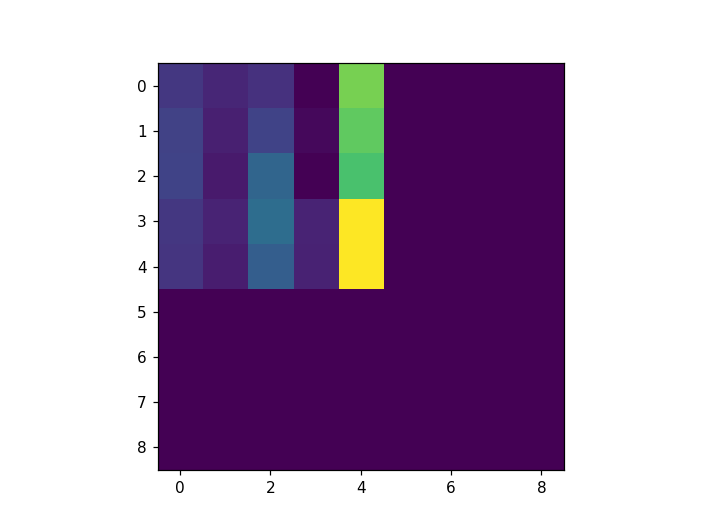

In [44]:
new_fig().imshow(stacked[178604])

In [46]:
stacked.shape

(178605, 81)

In [45]:
stacked = stacked.reshape(-1,81)

In [61]:
out = dl.fit_transform(stacked)

In [70]:
components = dl.components_

<IPython.core.display.Javascript object>


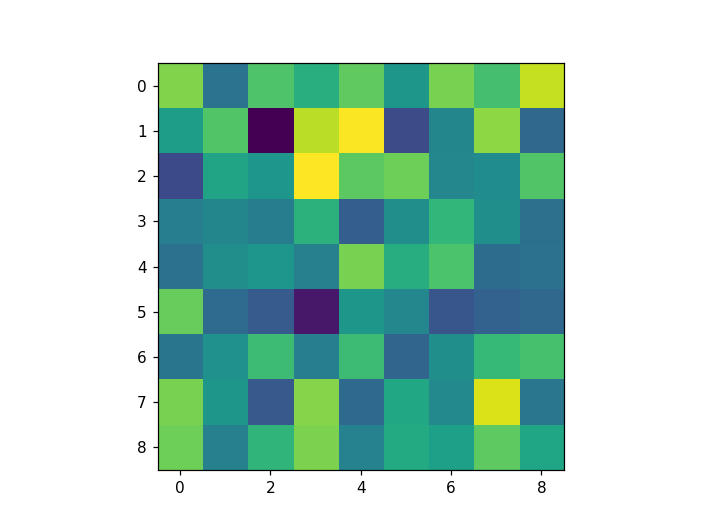

In [59]:
new_fig().imshow(components[50].reshape(9,9))

In [103]:
i = 3000

<IPython.core.display.Javascript object>


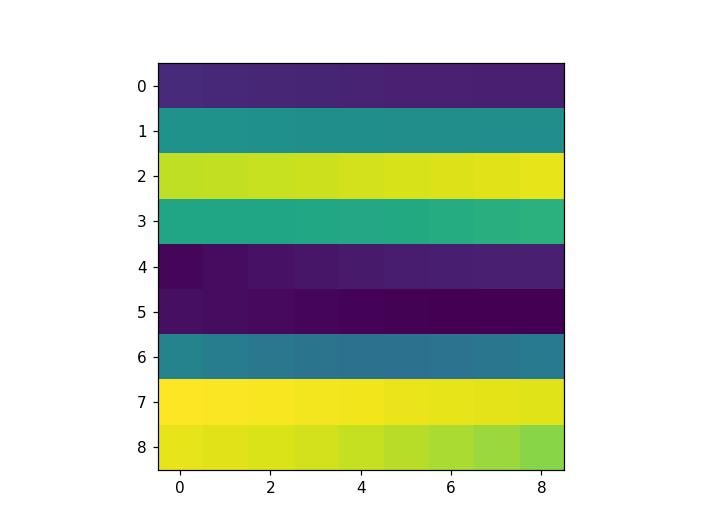

In [104]:
new_fig().imshow(stacked[i].reshape(9,9))

<IPython.core.display.Javascript object>


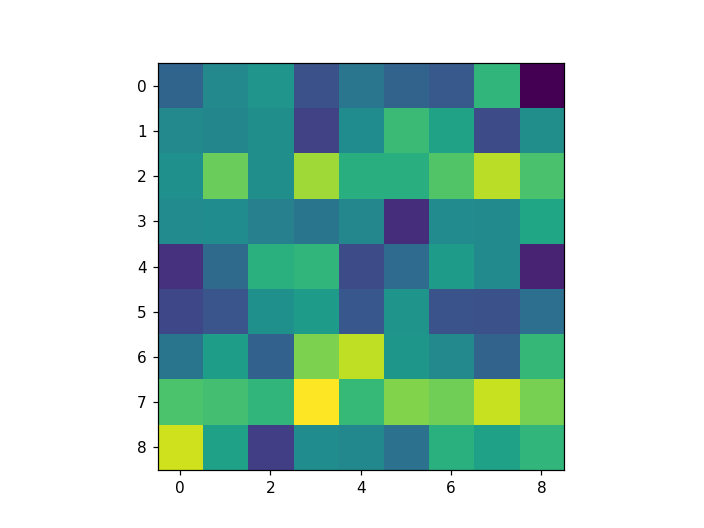

In [105]:
new_fig().imshow(np.matmul(out[i],components).reshape(9,9))

In [1]:
import models

In [6]:
print(torch.__version__)


1.0.1


In [7]:
import torch.nn

In [4]:

num_filters = 200
filter_size = (9,9)

s_layer = models.SparseLayer(dictionary_size = num_filters,input_size = filter_size)



In [110]:
out.shape

(178605, 200)

In [113]:
reshaped = out.reshape(5,81,441,200)

In [5]:
new_fig().imshow(reshaped[0,:,:,0])

NameError: name 'new_fig' is not defined

In [6]:
new_fig().imshow(filtered[0,0],cmap='gray')

NameError: name 'new_fig' is not defined